MSDS 422 Assignment # 4 for James Benco

1: Importing Data amd Required Libraries

In [132]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [133]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
import category_encoders
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import dummy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


We will first import the data from the Digit Recognizer Dataset

In [134]:
#Train Data file
digitTrainDat = pd.read_csv("train.csv")
TrainDat = digitTrainDat.copy()

In [135]:
#Test Data File
digitTestDat = pd.read_csv("test.csv")
TestDat = digitTestDat.copy()

In [136]:
#Sample Submission File
digitSubFile = pd.read_csv("sample_submission.csv")

In [137]:
#Checking all the headers and datatypes of the training data
TrainDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


All the data seems to be pixels which we will need to visualize to understand

2: Statistical EDA

<AxesSubplot:xlabel='label', ylabel='count'>

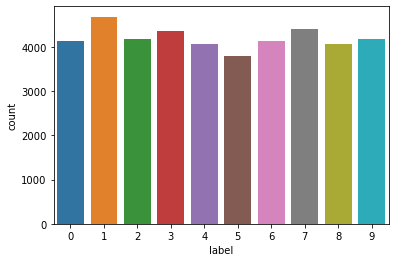

In [138]:
sns.countplot(data=TrainDat, x='label')

From this we can see that the dataset is comprised of visual pixelated images of the numbers 0-9.  All about similar distributions of the numbers with none being exactly equal to each other.

In [139]:
#first we will need to split into x and y train data
xTrain = TrainDat.drop(labels=['label'],axis=1)
yTrain = TrainDat['label']

We will now check for null values in the dataset

In [140]:
TrainDat.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

There seems to be no missing data for this dataset.

We will now convert our test/train data from a dataframe to numpy array

In [141]:
xTrain = xTrain.to_numpy()
yTrain = yTrain.to_numpy()

xTest = TestDat.to_numpy()

In [142]:
#Reshaping array 
xTrain = xTrain.reshape((-1,28,28))
xTest = xTest.reshape((-1,28,28))

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

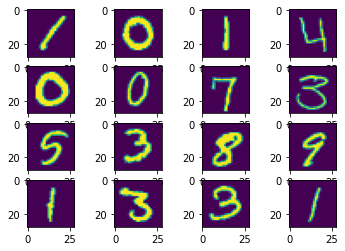

In [143]:
#Visualizing the images
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(xTrain[i])
plt.show()

In [144]:
#Reshaping again to encompass the data
xTrain = xTrain.reshape((-1,28*28))
xTest = xTest.reshape((-1,28*28))

3: MLP Model Creation

Model 1: Activation(reLU), Hidden_layers(64,64)

In [145]:
#We need to create 4 different models and compare them with different hyperparameters
#We shall create two different designs with alternate activation with logistic and reLu for each amount of hidden layers 
model1= MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=(64,64), early_stopping=True, max_iter=100)
model1.fit(xTrain,yTrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 64), max_iter=100)

Model 2: Activation(Logistic), Hidden_layers(64,64)

In [146]:
#Creation Model2 will have the same amount of hidden layers but use the logistic activation 
model2= MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(64,64), early_stopping=True, max_iter=100)
model2.fit(xTrain,yTrain)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(64, 64), max_iter=100)

Model 3: Activation(reLU) Hidden Layers(16,16)

In [147]:
model3 = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=(16,16),early_stopping=True,max_iter=100)
model3.fit(xTrain,yTrain)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(16, 16), max_iter=100)

Model4: Activation(Logistic), Hidden_layers(16,16)

In [148]:
model4 = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(16,16),early_stopping=True,max_iter=100)
model4.fit(xTrain,yTrain)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(16, 16), max_iter=100)

4: MLP Model Evaluation

We shall now compare models based on their respective iterations and accuracy scores for each iteration

Text(0.5, 0, 'Iterations')

Text(0.5, 1.0, 'Accuracy over Iterations')

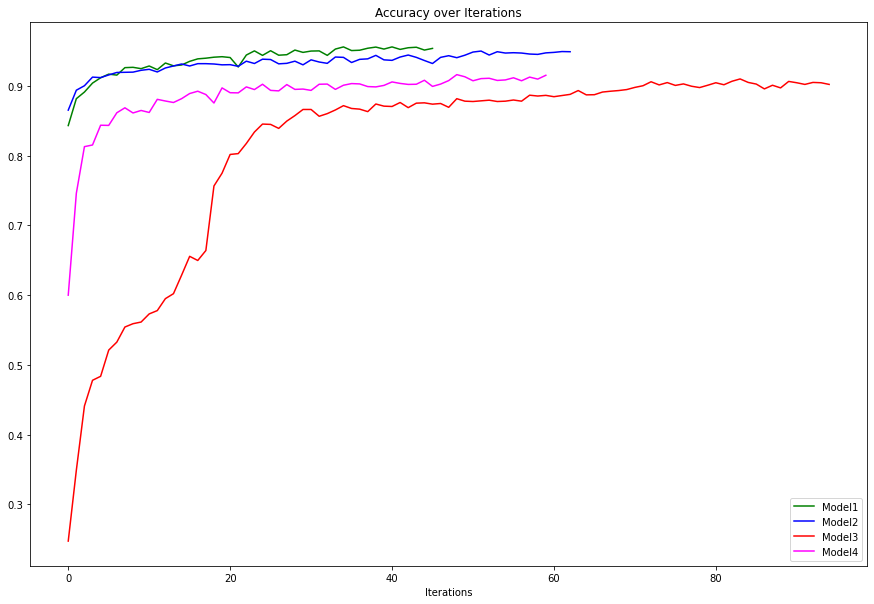

In [149]:
fig, ax = plt.subplots(1,sharex=True,sharey=True,figsize=(15,10))
plt.plot(model1.validation_scores_,color='green',label='Model1')
plt.plot(model2.validation_scores_,color='blue',label='Model2')
plt.plot(model3.validation_scores_,color='red',label='Model3')
plt.plot(model4.validation_scores_,color='magenta',label='Model4')
plt.xlabel('Iterations')
plt.title('Accuracy over Iterations')
plt.legend(loc='lower right')
plt.show()

From the validation scores of these various models it seems that the model with 64 nodes and 62 hidden layers provided the highest validation score.  Along with being the quickest model with the least amount of iterations necessary to get below tolerance level. 

5: Part 1B -ConvNet 

Installing and prepping data for convnet model

In [150]:
#installing keras
!pip install keras
!pip install tensorflow

In [151]:
#importing Keras and necessary convnet neural network libraries
from sklearn import metrics
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.optimizers import Adam, Adadelta
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [152]:
#reprepping data to use in a convNet model instead
x_Train = TrainDat.drop(labels=['label'],axis=1)
y_Train = TrainDat['label']

In [153]:
x_Test = TestDat

In [154]:
#Normalizing the data
x_Train = x_Train/255
x_Test = x_Test/255

In [155]:
#reshaping to work in model
x_Train = x_Train.values.reshape(-1,28,28,1)

x_Test = x_Test.values.reshape(-1,28,28,1)

In [156]:
#For convNet we shall use onehotencoding instead
y_Train = to_categorical(y_Train, num_classes=10)

In [157]:
#Splitting into training and validation data
x_Train, x_Val, y_Train, y_Val = train_test_split(x_Train, y_Train, test_size=0.1, random_state=2)
#Checking shapes
print("x_Train shape", x_Train.shape)
print("y_Train shape", y_Train.shape)
print("x_Val shape", x_Val.shape)
print("y_Val shape", y_Val.shape)

x_Train shape (37800, 28, 28, 1)
y_Train shape (37800, 10)
x_Val shape (4200, 28, 28, 1)
y_Val shape (4200, 10)


6: Building ConvNet Model

Model 5: Activation(relu), Optimizer(Adam)

In [158]:
#We will be working with a Sequential convNet neural network
model5 = Sequential()
#Convulution Layers build
#Adding in 1st convolution layer
model5.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
#Adding in MaxPooling2D arguments
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

#Now for another convolution layer
model5.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

#Fully connecting the model
model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10,activation='softmax'))#Dramatically increases accuracy with softmax activation here

#Defining the Optimizer
optimizer5 = Adam(lr=0.001)
           
#compiling all the layers created above into a working model
model5.compile(loss='categorical_crossentropy', optimizer=optimizer5, metrics=["accuracy"])

#DataGenerator
DataGenerator5 = ImageDataGenerator(rotation_range =10, zoom_range=0.1, width_shift_range = 0.1, height_shift_range=0.1)
DataGenerator5.fit(x_Train)

#fitting the model
result5 = model5.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-158-15ea0710e7cd>:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result5 = model5.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))


Epoch 1/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.6425 - accuracy: 0.7875 - val_loss: 0.1005 - val_accuracy: 0.9707
Epoch 2/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.2838 - accuracy: 0.9128 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 3/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.2256 - accuracy: 0.9303 - val_loss: 0.0668 - val_accuracy: 0.9793
Epoch 4/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.1963 - accuracy: 0.9395 - val_loss: 0.0541 - val_accuracy: 0.9821
Epoch 5/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1781 - accuracy: 0.9458 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 6/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1681 - accuracy: 0.9470 - val_loss: 0.0509 - val_accuracy: 0.9857
Epoch 7/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.1539 - accuracy: 0.9516 - val_loss: 0.0518 -

Model 6: Activation(sigmoid), Optimizer(Adam)

In [159]:
model6 = Sequential()
#Convulution Layers build
#Adding in 1st convolution layer
model6.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='sigmoid', input_shape = (28,28,1)))
#Adding in MaxPooling2D arguments
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.25))

#Now for another convolution layer
model6.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='sigmoid'))
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.25))

#Fully connecting the model
model6.add(Flatten())
model6.add(Dense(256, activation='sigmoid'))
model6.add(Dropout(0.5))
model6.add(Dense(10,activation='softmax'))#Dramatically increases accuracy with softmax activation here

#Defining the Optimizer
optimizer6 = Adam(lr=0.001)
           
#compiling all the layers created above into a working model
model6.compile(loss='categorical_crossentropy', optimizer=optimizer6, metrics=["accuracy"])

#DataGenerator
DataGenerator6 = ImageDataGenerator(rotation_range =10, zoom_range=0.1, width_shift_range = 0.1, height_shift_range=0.1)
DataGenerator6.fit(x_Train)

#fitting the model
result6 = model6.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))

Epoch 1/15


<ipython-input-159-dd98f59df1ca>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result6 = model6.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))


1182/1182 [==============================] - 18s 15ms/step - loss: 2.3158 - accuracy: 0.1069 - val_loss: 2.2939 - val_accuracy: 0.2019
Epoch 2/15
1182/1182 [==============================] - 18s 15ms/step - loss: 1.2273 - accuracy: 0.5752 - val_loss: 0.4433 - val_accuracy: 0.8621
Epoch 3/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.6701 - accuracy: 0.7834 - val_loss: 0.2525 - val_accuracy: 0.9236
Epoch 4/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.4772 - accuracy: 0.8476 - val_loss: 0.1779 - val_accuracy: 0.9443
Epoch 5/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.3829 - accuracy: 0.8798 - val_loss: 0.1382 - val_accuracy: 0.9567
Epoch 6/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.3238 - accuracy: 0.8989 - val_loss: 0.1212 - val_accuracy: 0.9631
Epoch 7/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.2935 - accuracy: 0.9081 - val_loss: 0.1064 - val_accura

Model 7: Activation(relu), Optimizer(Adadelta)

In [160]:
model7 = Sequential()
#Convulution Layers build
#Adding in 1st convolution layer
model7.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
#Adding in MaxPooling2D arguments
model7.add(MaxPool2D(pool_size=(2,2)))
model7.add(Dropout(0.25))

#Now for another convolution layer
model7.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model7.add(MaxPool2D(pool_size=(2,2)))
model7.add(Dropout(0.25))

#Fully connecting the model
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(10,activation='softmax'))#Dramatically increases accuracy with softmax activation here

#Defining the Optimizer
optimizer7 = Adadelta(lr=0.001)
           
#compiling all the layers created above into a working model
model7.compile(loss='categorical_crossentropy', optimizer=optimizer5, metrics=["accuracy"])

#DataGenerator
DataGenerator7 = ImageDataGenerator(rotation_range =10, zoom_range=0.1, width_shift_range = 0.1, height_shift_range=0.1)
DataGenerator7.fit(x_Train)

#fitting the model
result7 = model7.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adadelta.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)
<ipython-input-160-b578bd20dc29>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result7 = model7.fit_generator(DataGenerator8.flow(x_Train,y_Train), epochs=15,validation_data = (x_Val,y_Val))


Epoch 1/15
1182/1182 [==============================] - 19s 15ms/step - loss: 0.4787 - accuracy: 0.8429 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 2/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.2594 - accuracy: 0.9207 - val_loss: 0.0753 - val_accuracy: 0.9755
Epoch 3/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.2168 - accuracy: 0.9341 - val_loss: 0.0693 - val_accuracy: 0.9810
Epoch 4/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.1956 - accuracy: 0.9406 - val_loss: 0.0614 - val_accuracy: 0.9814
Epoch 5/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1815 - accuracy: 0.9453 - val_loss: 0.0541 - val_accuracy: 0.9829
Epoch 6/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1741 - accuracy: 0.9453 - val_loss: 0.0542 - val_accuracy: 0.9831
Epoch 7/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1640 - accuracy: 0.9504 - val_loss: 0.0525 -

Model 8: Activation(sigmoid), Optimizer(Adadelta)

In [161]:
model8 = Sequential()
#Convulution Layers build
#Adding in 1st convolution layer
model8.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='sigmoid', input_shape = (28,28,1)))
#Adding in MaxPooling2D arguments
model8.add(MaxPool2D(pool_size=(2,2)))
model8.add(Dropout(0.25))

#Now for another convolution layer
model8.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='sigmoid'))
model8.add(MaxPool2D(pool_size=(2,2)))
model8.add(Dropout(0.25))

#Fully connecting the model
model8.add(Flatten())
model8.add(Dense(256, activation='sigmoid'))
model8.add(Dropout(0.5))
model8.add(Dense(10,activation='softmax'))#Dramatically increases accuracy with softmax activation here

#Defining the Optimizer
optimizer8 = Adadelta(lr=0.001)
           
#compiling all the layers created above into a working model
model8.compile(loss='categorical_crossentropy', optimizer=optimizer6, metrics=["accuracy"])

#DataGenerator
DataGenerator8 = ImageDataGenerator(rotation_range =10, zoom_range=0.1, width_shift_range = 0.1, height_shift_range=0.1)
DataGenerator8.fit(x_Train)

#fitting the model
result8 = model8.fit_generator(DataGenerator8.flow(x_Train,y_Train),epochs=15, validation_data = (x_Val,y_Val))

Epoch 1/15


<ipython-input-161-c5cd0a86f07a>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result8 = model8.fit_generator(DataGenerator8.flow(x_Train,y_Train),epochs=15, validation_data = (x_Val,y_Val))


1182/1182 [==============================] - 18s 15ms/step - loss: 1.6190 - accuracy: 0.4229 - val_loss: 0.7414 - val_accuracy: 0.7702
Epoch 2/15
1182/1182 [==============================] - 18s 15ms/step - loss: 1.0050 - accuracy: 0.6608 - val_loss: 0.4843 - val_accuracy: 0.8531
Epoch 3/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.7375 - accuracy: 0.7577 - val_loss: 0.3036 - val_accuracy: 0.9069
Epoch 4/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.5554 - accuracy: 0.8210 - val_loss: 0.1985 - val_accuracy: 0.9433
Epoch 5/15
1182/1182 [==============================] - 17s 15ms/step - loss: 0.4467 - accuracy: 0.8585 - val_loss: 0.1679 - val_accuracy: 0.9510
Epoch 6/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.3876 - accuracy: 0.8779 - val_loss: 0.1492 - val_accuracy: 0.9586
Epoch 7/15
1182/1182 [==============================] - 18s 15ms/step - loss: 0.3527 - accuracy: 0.8906 - val_loss: 0.1374 - val_accura

7: Evaluating the Convolution Neural Network Models

Text(0.5, 0, 'Epoch')

Text(0.5, 1.0, 'Accuracy over Epoch')

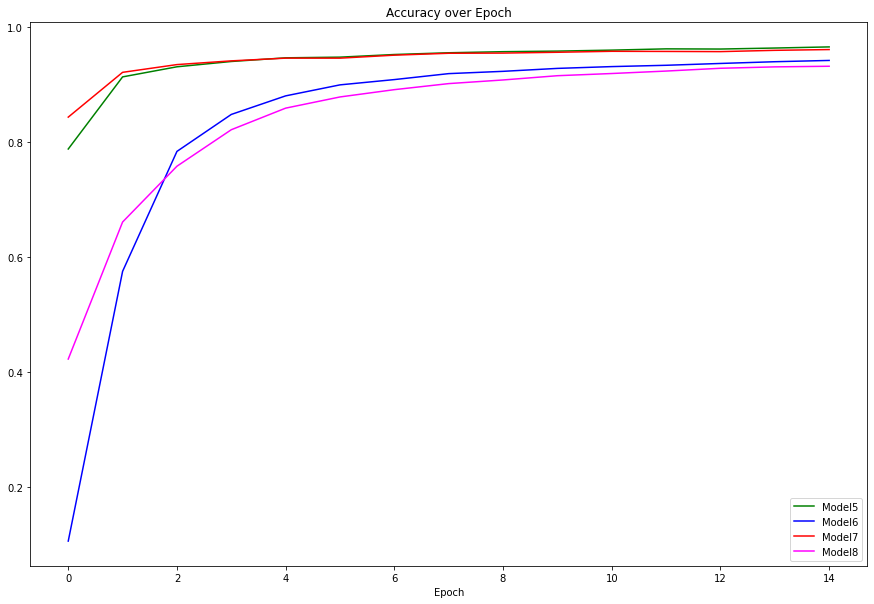

In [162]:
#Getting Evaluation metrics for each model
hist5 = result5.history
acc5 = hist5['accuracy']

hist6 = result6.history
acc6 = hist6['accuracy']

hist7 = result7.history
acc7 = hist7['accuracy']

hist8 = result8.history
acc8 = hist8['accuracy']

fig, ax = plt.subplots(1,sharex=True,sharey=True,figsize=(15,10))
plt.plot(acc5,color='green',label='Model5')
plt.plot(acc6,color='blue',label='Model6')
plt.plot(acc7,color='red',label='Model7')
plt.plot(acc8,color='magenta',label='Model8')
plt.xlabel('Epoch')
plt.title('Accuracy over Epoch')
plt.legend(loc='lower right')
plt.show()


It seems that both Model 5 and Model 7 (relu) models performed the best amount the ConvNet Neural Network Models.  Both of these have the best accuracy scores similar to Model 1 in part 1A.  From this I will use Model1 in part 1A as that had a slightly higher accuracy score, but ultimately I could use either Model1,Model5, or Model7 and have good accuracy results.

7: Test Data and Submission

In [163]:
result = model1.predict(xTest)
result = pd.Series(result,name='Label')

In [164]:
submission = pd.concat([pd.Series(range(1,28001),name="ImageId"),result],axis=1)

In [165]:
submission.to_csv('Submission.csv', index = False)